[scipy stats docs](https://docs.scipy.org/doc/scipy/reference/stats.html)  
[numpy stats docs](https://numpy.org/doc/stable/reference/routines.statistics.html)  
[tutorial](https://www.tutorialspoint.com/scipy/scipy_stats.htm)  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

**Statistics review**
- [Aspiring network scientist](https://www.networkatlas.eu/index.htm) - chapter on probability
- [Cheatsheet - to read](https://stanford.edu/~shervine/teaching/cme-106/cheatsheet-probability)
- https://web.mit.edu/~csvoss/Public/usabo/stats_handout.pdf
- https://www.stat.auckland.ac.nz/~fewster/325/notes/ch3.pdf



## Definitions 

[Conditional probabilities visualization](https://setosa.io/conditional/)

**Probability mass function (PMF)**  
The probability mass function is a function that gives the probability that a discrete random variable is **exactly** equal to some value. Let $f: \mathbb R \to [0, 1]$. Then we have:
$$f(x_j) = P(X = x_j)$$
and $\sum_{x\in X}f(x) = 1$

**Probability density function (PDF)**  
Specifies the probability of a random variable $X$ falling withing a **particular** range of values, as opposed to taking any one value.

**Cumulative distribution function (CDF)**
Probability that a random variable $X$ will take a value less or equal to some $x$. $F:\mathbb R \to [0, 1]$  
For discrete:
$$F(x) = \sum_{x_i \leq x} P(X = x_i)$$
For continuous:
$$F(x) = \int_{-\infty}^x f(y)dy$$

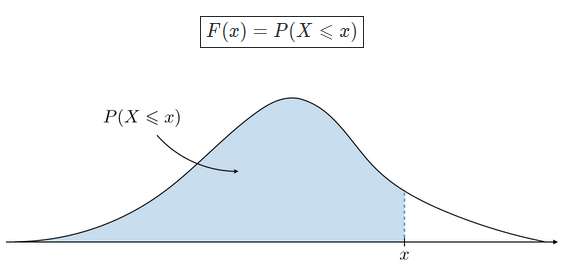


In [2]:
X = np.array(
    [[1, 2, 3], [4, 5, 6]],
)

print(np.mean(X))
print(np.mean(X, axis=0))  # Mean over cols
print(np.mean(X, axis=1))  # Mean over rows
print()
print(np.std(X))
print(np.std(X, axis=0))  # std over cols
print(np.std(X, axis=1))  # std over rows

print()
print(np.var(X))
print(np.var(X, axis=0))
print(np.var(X, axis=1))

3.5
[2.5 3.5 4.5]
[2. 5.]

1.707825127659933
[1.5 1.5 1.5]
[0.81649658 0.81649658]

2.9166666666666665
[2.25 2.25 2.25]
[0.66666667 0.66666667]


In [3]:
np.var(X) == np.std(X) ** 2

True

In [4]:
# Variance with formula

print(np.sum((X - np.mean(X, axis=0)) ** 2, axis=0) / len(X))
print(np.sum((X.T - np.mean(X, axis=1)) ** 2, axis=0) / len(X[0]))

[2.25 2.25 2.25]
[0.66666667 0.66666667]


In [5]:
np.cov(X)

array([[1., 1.],
       [1., 1.]])

# Distributions

## Discrete distributions

### Bernoulli

*Intuition*: toss a (biased) coin, that lands heads with some probability $p$. 

Probability mass function (PMF):

$$f(k) = \begin{cases}
1 - p & \text{ if } k = 0 \\
p & \text{ if } k = 1
\end{cases}$$
for $k \in \{0, 1\}, 0 \leq p \leq 1$. Can also be written as $f(k) = p^k(1-p)^{1-k}$.

In [6]:
p = 0.3
mean, var = st.bernoulli.stats(p, moments="mv")
print(f"{mean = }\n{var = }")

mean = 0.3
var = 0.21


### Binomial

*Intuition*: Toss $n$ biased coins, independently, that land heads with probability $p$. What is the probability of exactly $k$ of them landing heads?

PMF:
$$\binom n k p^k(1-p)^{n-k}$$

*Intuition*: $k$ successes occur with probability $p^k$, $n-k$ failures occur with probability $(1-p)^{n-k}$

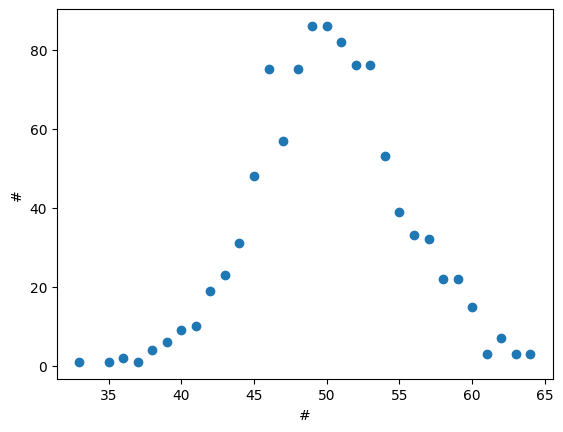

np.mean(X) = 50.2
np.std(X) = 4.859012245302536


In [7]:
n, p, size = 100, 0.5, 1000  # number of trials, probability of each trial, number of experiments
# Run many experiments. X will contain how many experiments successes per experiment
X = np.random.binomial(n, p, 1000)

values, counts = np.unique(X, return_counts=True)
plt.scatter(values, counts)
plt.xlabel("#")
plt.ylabel("#")
plt.show()
print(f"{np.mean(X) = }")
print(f"{np.std(X) = }")

### Geometric

*Intuition*: Toss biased coins, independently, that land heads with a probability $p$. What is the probability that the first success requires $k$ tries?

Probability mass function:
$$f(k) = (1 - p)^{k-1}p$$
for $k \geq 1, 0 \leq p \leq 1$. $p$ is the probability of a single success

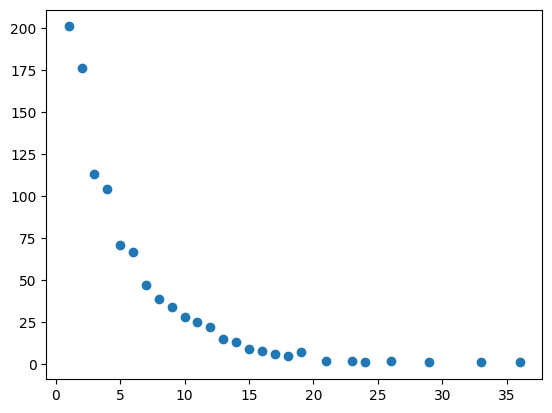

np.mean(X) = 5.058
np.std(X) = 4.568001313484926


In [8]:
## Numpy

X = np.random.geometric(p=0.2, size=1000)  # p = probability of success

values, counts = np.unique(X, return_counts=True)
plt.scatter(values, counts)
plt.show()
print(f"{np.mean(X) = }")
print(f"{np.std(X) = }")

### Poisson

The Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.



In [9]:
X = np.random.poisson(lam=50, size=1000)

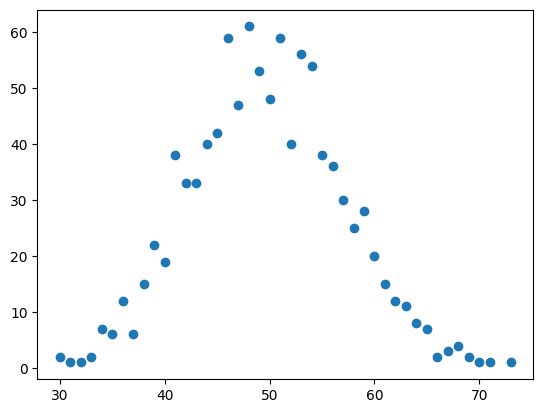

np.mean(X) = 49.707
np.std(X) = 7.116962203075129


In [10]:
values, counts = np.unique(X, return_counts=True)
plt.scatter(values, counts)
plt.show()
print(f"{np.mean(X) = }")
print(f"{np.std(X) = }")

## Continuous distributions

### Uniform distribution

[Wikipedia](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

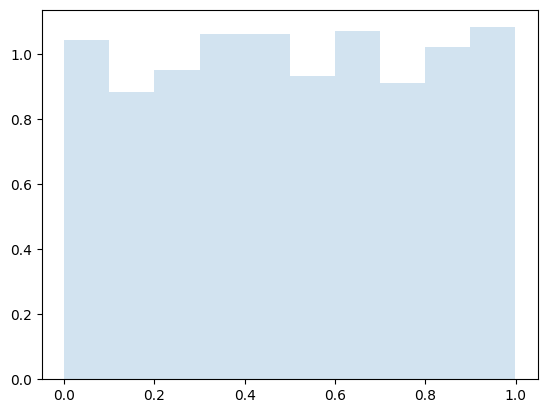

mean
np.mean(X) = 0.5026202870407261
(a + b) / 2 = 0.5
std
np.std(X) = 0.2905860117925361
np.sqrt((b - a) ** 2 / 12)  = 0.28867513459481287


In [11]:
# Numpy
a = 0
b = 1
n_samples = 1000

X = np.random.uniform(low=a, high=b, size=1000)
plt.hist(X, alpha=0.2, density=True)
plt.show()

print("mean")
print(f"{np.mean(X) = }")
print(f"{(a + b) / 2 = }")
print("std")
print(f"{np.std(X) = }")
print(f"{np.sqrt((b - a) ** 2 / 12)  = }")

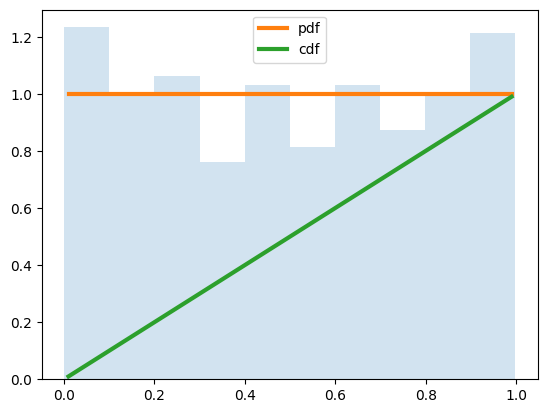

In [16]:
##Scipy
a = 0
b = 1
n_samples = 1000

uniform_distribution = st.uniform(loc=a, scale=b)
x = np.linspace(uniform_distribution.ppf(0.01), uniform_distribution.ppf(0.99), n_samples)
p = uniform_distribution.pdf(x)  # everything has prob 1
c = uniform_distribution.cdf(x)  # everything has prob 1
samples = [uniform_distribution.rvs() for _ in range(n_samples)]  # sample

plt.hist(samples, density=True, alpha=0.2)
plt.plot(x, p, linewidth=3, label="pdf")
plt.plot(x, c, linewidth=3, label="cdf")
plt.legend()
plt.show()

### Gaussian

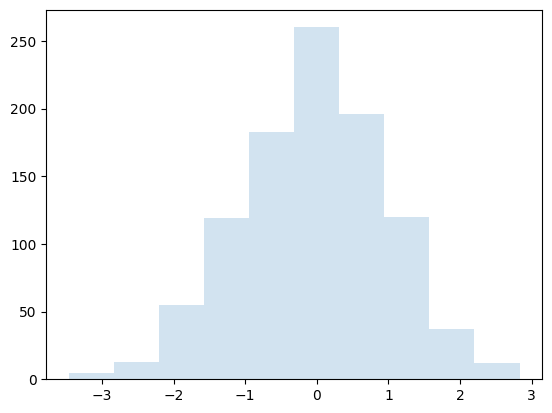

In [17]:
# Numpy

X = np.random.normal(loc=0, scale=1, size=1000)
plt.hist(X, alpha=0.2)
plt.show()

In [18]:
st.norm.ppf(0.01), st.norm.ppf(0.99)

(-2.3263478740408408, 2.3263478740408408)

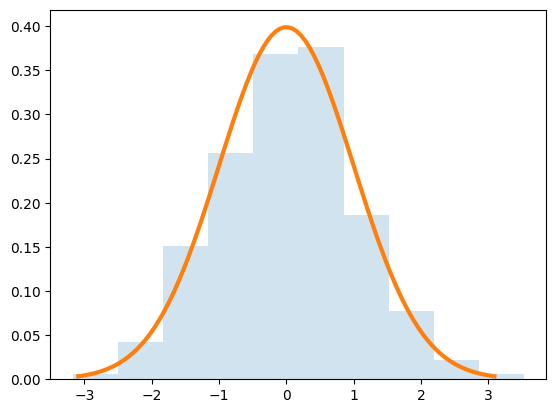

In [20]:
# Scipy

x = np.linspace(st.norm.ppf(0.001), st.norm.ppf(0.999), 100)
y = st.norm.pdf(x)
samples = [st.norm.rvs() for _ in range(n_samples)]  # sample
plt.hist(samples, density=True, alpha=0.2)
plt.plot(x, y, linewidth=3)
plt.show()